In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm, datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import math

Задание 1

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris_frame = pd.DataFrame(iris.data, columns = iris['feature_names'])
iris_frame['target'] = iris['target']
iris_frame['name'] = iris_frame['target'].map(lambda x : iris['target_names'][x])
iris_frame.iloc[::10,]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
10,5.4,3.7,1.5,0.2,0,setosa
20,5.4,3.4,1.7,0.2,0,setosa
30,4.8,3.1,1.6,0.2,0,setosa
40,5.0,3.5,1.3,0.3,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
60,5.0,2.0,3.5,1.0,1,versicolor
70,5.9,3.2,4.8,1.8,1,versicolor
80,5.5,2.4,3.8,1.1,1,versicolor
90,5.5,2.6,4.4,1.2,1,versicolor


In [ ]:
iris_frame.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [ ]:
iris_frame.iloc[:,[0,1,2,3,5]].groupby('name').corr()

sepal length (cm)  sepal width (cm)  \
name                                                                
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   

                              petal length (cm)  petal width (cm)  
name                                                               
setosa     sepal length (cm)           0.267176          0.278098  
           sepal width (cm)            0.177700          0.232752  
           petal length (cm)           1.000000          0.331630  
           petal width (cm)            0.331630          1.000000  
versicolor sepal length (cm)           0.754049          0.546461  
           sepal width (cm)            0.560522          0.663999  
           petal length (cm)           1.000000          0.786668  
           petal width (cm)            0.786668          1.000000  
virginica  sepal length (cm)           0.864225          0.281108  
           sepal width (cm)            0.401045          0.537728  
           petal length (cm)           1.000000          0.322108  
           petal width (cm)            0.322108          1.000000

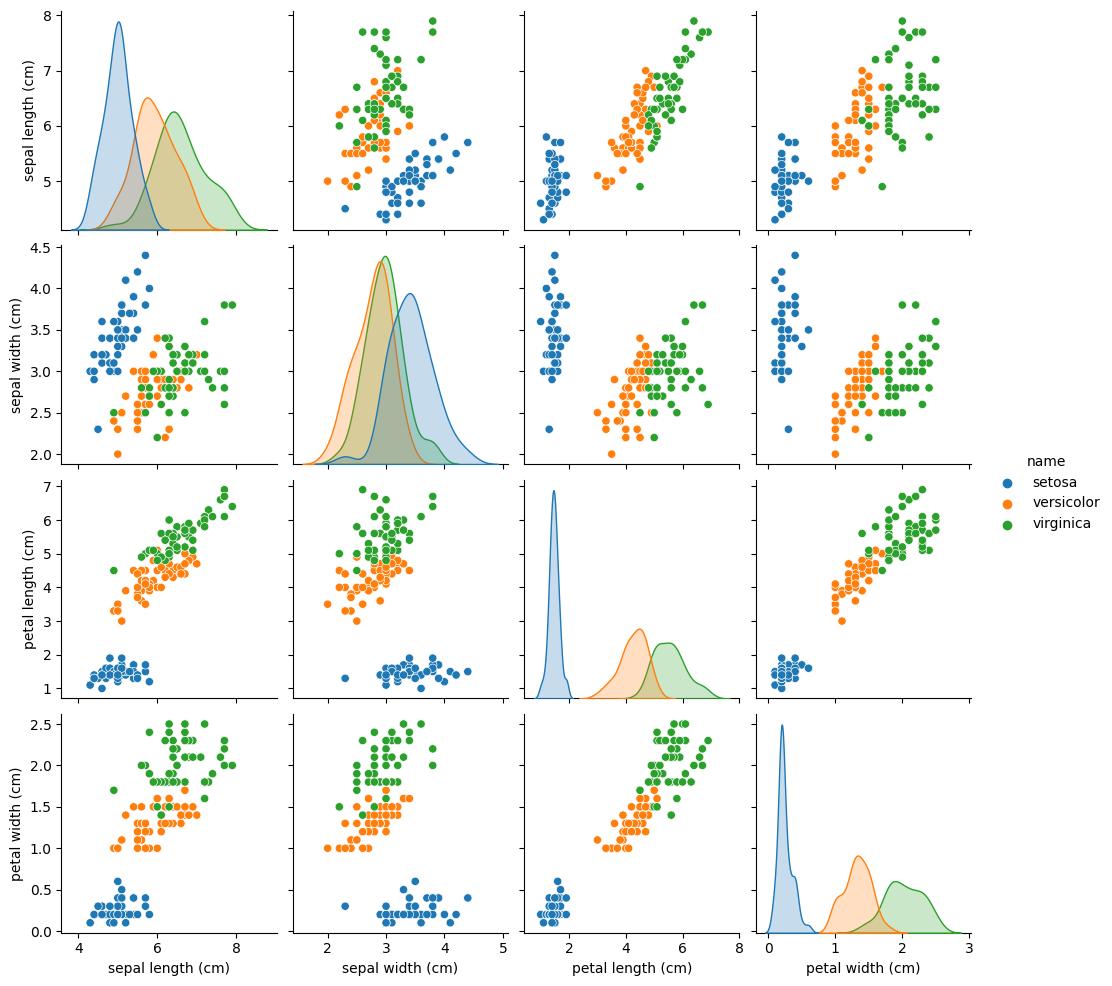

In [ ]:
sns.pairplot(iris_frame.iloc[:,[0,1,2,3,5]], hue = 'name')

Задание 2

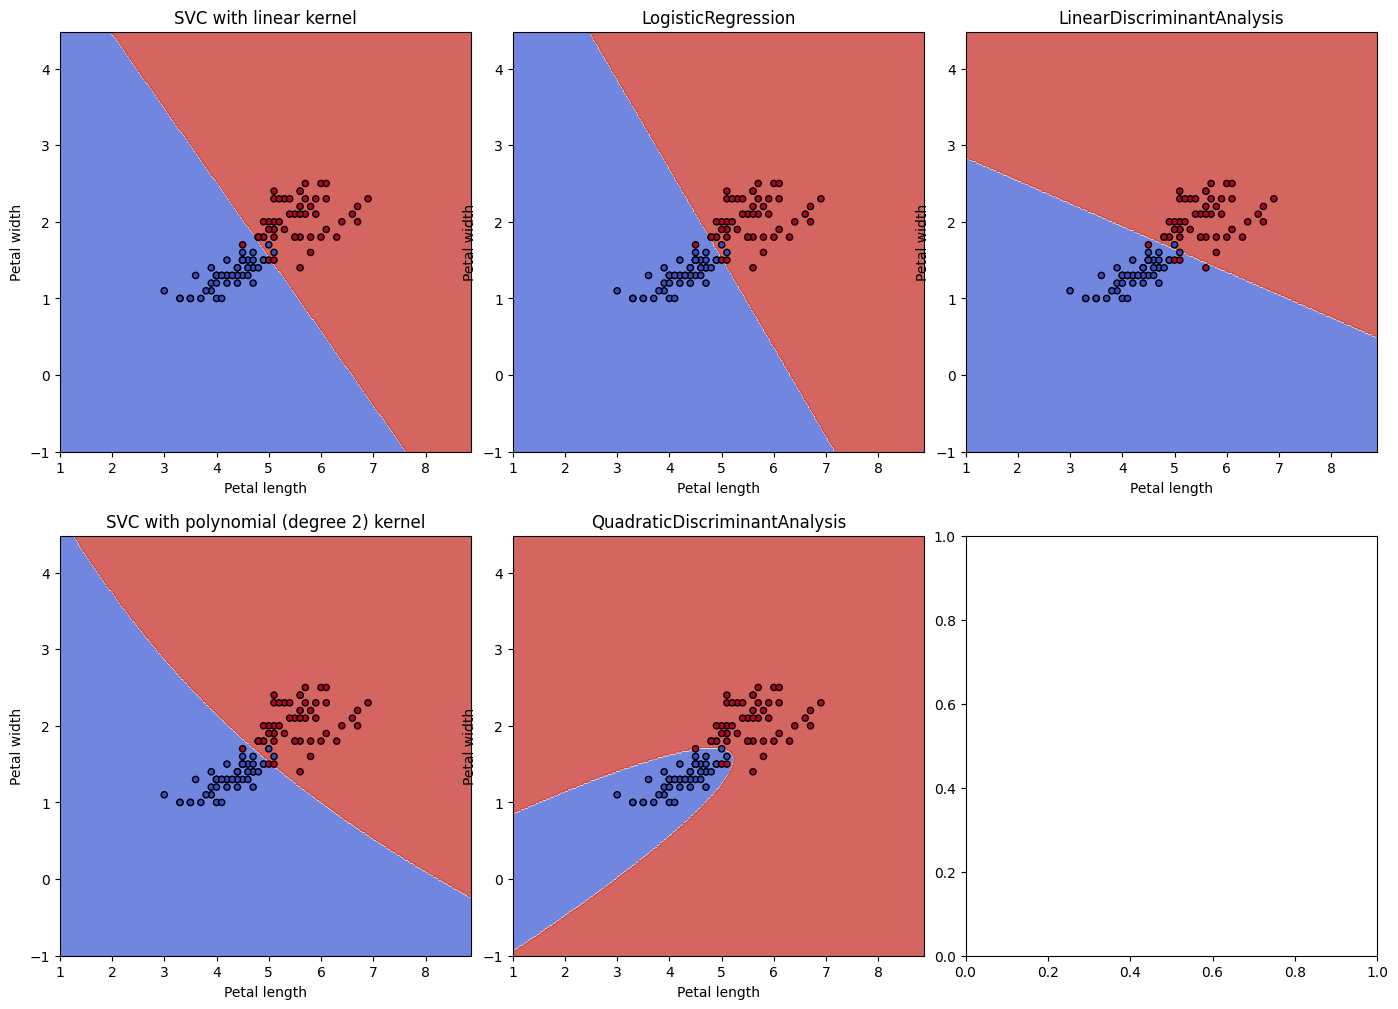

In [ ]:
def make_meshgrid(x, y, h=.02):
    d = 2
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


X = iris.data[iris.target!=0, -2:]
y = iris.target[iris.target!=0]

C = 1.0
models = [svm.SVC(kernel='linear', C=C),
          #GaussianNB(),
          LogisticRegression(random_state=0),
          LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
          QuadraticDiscriminantAnalysis()]

for clf in models:
  clf.fit(X, y)

titles = ['SVC with linear kernel',
          #'naive Gauss',
          'LogisticRegression',
          'LinearDiscriminantAnalysis',
          'SVC with polynomial (degree 2) kernel',
          'QuadraticDiscriminantAnalysis']

fig, sub = plt.subplots(2, 3,figsize=(17,12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    ax.set_title(title)

plt.show()

Задание 3

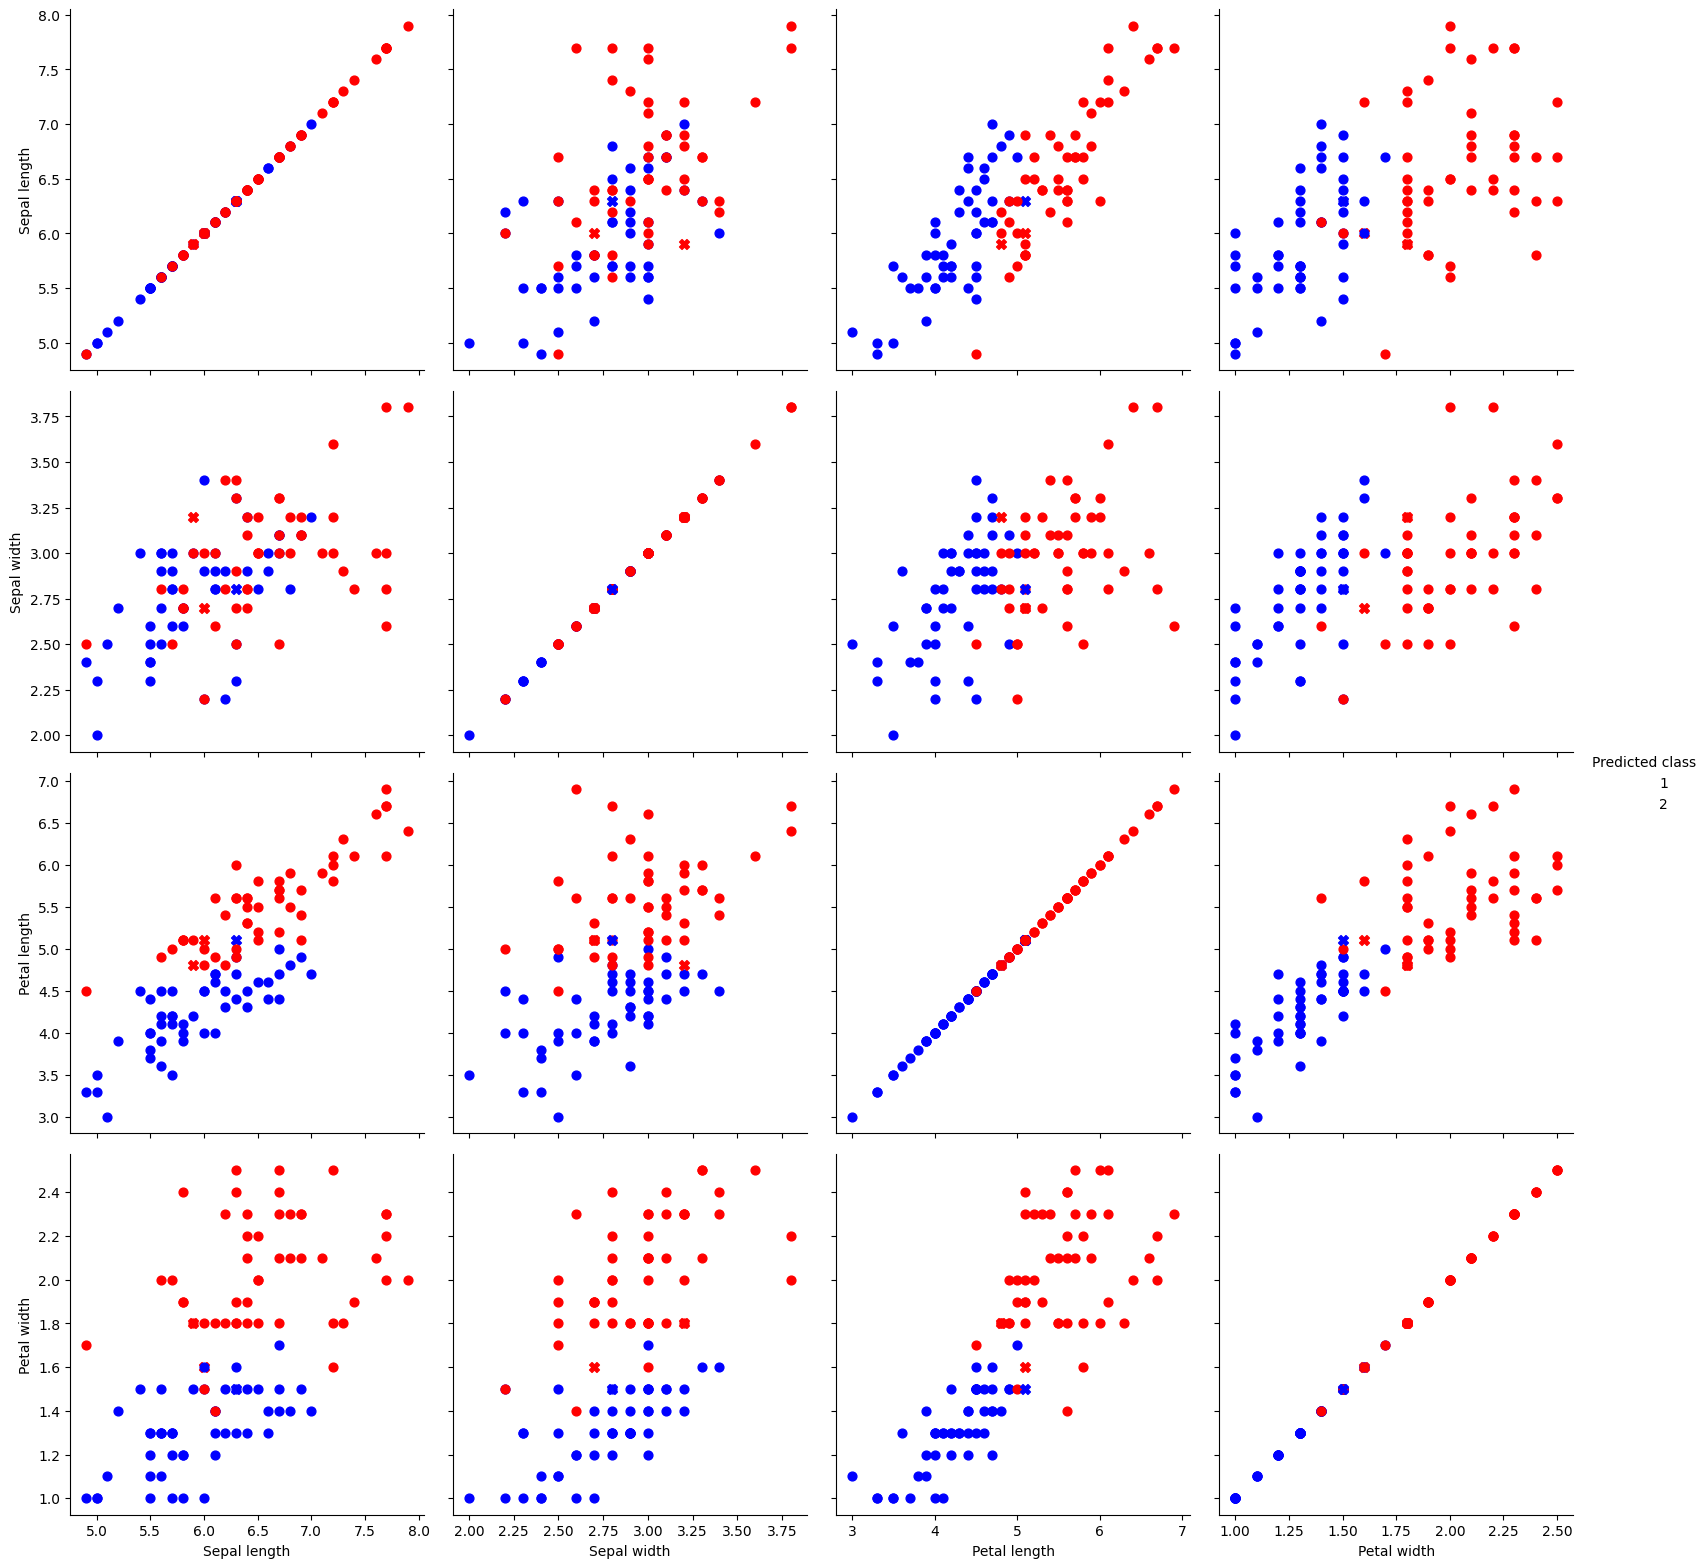

In [ ]:


X = iris.data[iris.target!=0, :4]
y = iris.target[iris.target!=0]



titles_2 = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)


X0, X1, X2, X3 = X[:, 0], X[:, 1], X[:, 2], X[:, 3]
array_X = [X0, X1, X2, X3]


predicted_labels = lda.predict(np.c_[X0, X1, X2, X3])
df_grid = pd.DataFrame({'Sepal length': X0, 'Sepal width': X1, 'Petal length': X2, 'Petal width': X3, 'Predicted class': predicted_labels})
a = sns.PairGrid(df_grid, hue='Predicted class', palette={1:"blue", 2:"red"}, height = 4)

for i in range(0, 4):
  for j in range(0, 4):
    ax = a.axes[i, j]
    row = 0
    for real_class in y:
      if real_class == 1 and df_grid.loc[row, 'Predicted class'] == 1:
        ax.scatter(df_grid.iloc[row, j], df_grid.iloc[row, i], s = 40, marker="o", color = "blue")
      elif real_class == 2 and df_grid.loc[row, 'Predicted class'] == 2:
        ax.scatter(df_grid.iloc[row, j], df_grid.iloc[row, i], s = 40, marker="o", color = "red")
      elif real_class == 1 and df_grid.loc[row, 'Predicted class'] == 2:
        ax.scatter(df_grid.iloc[row, j], df_grid.iloc[row, i], s = 50, marker="X", color = "red")
      elif real_class == 2 and df_grid.loc[row, 'Predicted class'] == 1:
          ax.scatter(df_grid.iloc[row, j], df_grid.iloc[row, i], s = 50, marker="X", color = "blue")
      row = row + 1

a.add_legend()
plt.show()





Задание 4

In [ ]:

class QDA:
  def fit(self, X, y):
    sample = pd.DataFrame(np.c_[X, y])
    last_column = sample.shape[1] - 1
    num_features = sample.size - sample.iloc[:, :-1].size

    targets = np.sort(np.unique(np.array(y)))
    features = []
    self.mu = []
    self.cov = []
    self.pi = []
    i = 0
    for target in targets:
      data = sample[sample[last_column] == target]
      features.append(data.iloc[:, :-1])
      self.mu.append(features[i].mean(axis=0).to_numpy())
      self.cov.append(np.cov(features[i], rowvar=False))
      self.pi.append(np.array(features[i]).size / num_features)
      i = i + 1

  def predict(self, X_test):
    predicted = []
    for x in X_test:
      D = []
      for mu, cov, pi in zip(self.mu, self.cov, self.pi):
        D.append((-0.5 * (np.dot(np.dot(np.transpose((np.array(x) - mu)), np.linalg.inv(cov)), (np.array(x) - mu)))) - (0.5 * math.log(np.linalg.det(cov))) + math.log(pi))
      target = np.argmax(np.array(D))
      predicted.append(target)
    return np.array(predicted)

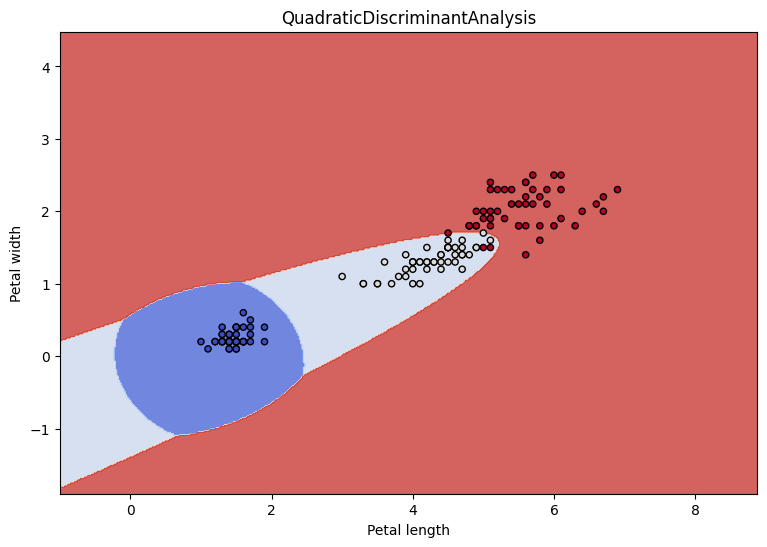

In [ ]:
def make_meshgrid(x, y, h=.02):
    d = 2
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, qda, xx, yy, **params):
    Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


qda = QDA()

X = iris.data[:, -2:]
y = iris.target

qda.fit(X, y)

fig, ax = plt.subplots(1, 1,figsize=(9,6))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, qda, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
#ax.set_xticks(())
#ax.set_yticks(())
ax.set_title('QuadraticDiscriminantAnalysis')

plt.show()